# Task 3: Customer Segmentation / Clustering

### Importing Data and Merging

In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [18]:
merged_df = transactions.merge(customers, how="inner", on="CustomerID").merge(products, how="inner", on="ProductID")
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


### Feature Selection

Features from Customer dataset:
1. Region

Features from Product dataset:
1. Category

Features from Transactions dataset:
1. Quantity
2. TotalValue
3. Price

In [7]:
features = merged_df[['Region', 'Quantity', 'TotalValue', 'Price_x', 'Category']]

In [8]:
categorical_cols = ['Region', 'Category']
numerical_cols = ['Quantity', 'TotalValue', 'Price_x']

Creating a preprcessing pipeline to normalise the numerical features and convert categorical features into binary columns using One Hot encoding method

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

processed_features = preprocessor.fit_transform(features)
processed_features

array([[-1.37548802, -0.7898504 ,  0.19994831, ...,  0.        ,
         1.        ,  0.        ],
       [-1.37548802, -0.7898504 ,  0.19994831, ...,  0.        ,
         1.        ,  0.        ],
       [-1.37548802, -0.7898504 ,  0.19994831, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.30926413, -1.24714597, -1.80380521, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.41434675, -1.28532833, -1.80380521, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48057063, -1.32351068, -1.80380521, ...,  1.        ,
         0.        ,  0.        ]])

Checking if processed_features obtained is a sparse matrix and converting it into a dense matrix.

In [10]:
if hasattr(processed_features, 'toarray'):
    processed_features_array = processed_features.toarray()  # Convert sparse matrix to dense
else:
    processed_features_array = processed_features

processed_features_df = pd.DataFrame(
    processed_features_array,
    columns=(numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out()))
)

processed_features_df

,Quantity,TotalValue,Price_x,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor
0,-1.375488,-0.789850,0.199948,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.375488,-0.789850,0.199948,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.375488,-0.789850,0.199948,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.480571,-0.179825,0.199948,0.0,0.0,1.0,0.0,1.0,0.0
4,0.414347,0.430200,0.199948,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
995,-0.480571,-0.162540,0.230233,0.0,0.0,1.0,0.0,0.0,1.0
996,1.309264,-1.247146,-1.803805,0.0,0.0,1.0,1.0,0.0,0.0
997,1.309264,-1.247146,-1.803805,0.0,0.0,1.0,1.0,0.0,0.0
998,0.414347,-1.285328,-1.803805,0.0,0.0,1.0,1.0,0.0,0.0


### Implementing Clustering Algorithm

Using three metrics (elbow, silhouette and DB-index) to determine the optimum value of k

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


inertia = []  # To store sum of squared distances for each k
silhouette_scores = []  # To store silhouette scores for each k
db_values = [] # To store DB-index values for each k
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_features_df)
    clusters = kmeans.fit_predict(processed_features_df)
    processed_features_df['Cluster'] = clusters
    db_index = davies_bouldin_score(processed_features_df.drop(columns='Cluster'), clusters)
    db_values.append(db_index)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_features_df, kmeans.labels_))

db_values

[1.3147441335829617,
 1.2779738724392093,
 1.3209489822562734,
 1.5402707330507053,
 1.7186369531854915,
 1.8282035144833118,
 1.9066133853950937,
 1.8665652526931977,
 1.8680910684985832]

DB-index value is lowest for k=3

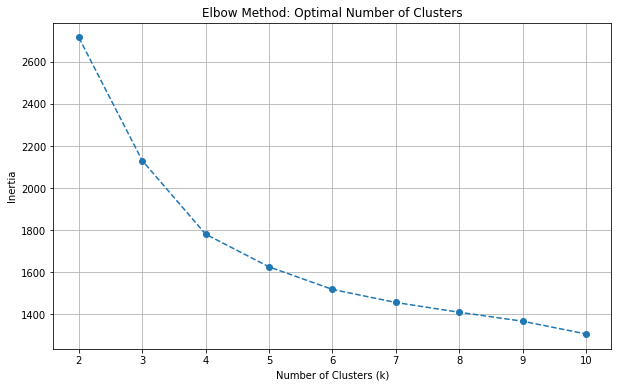

In [12]:
# Plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

The elbow point occures at k=4

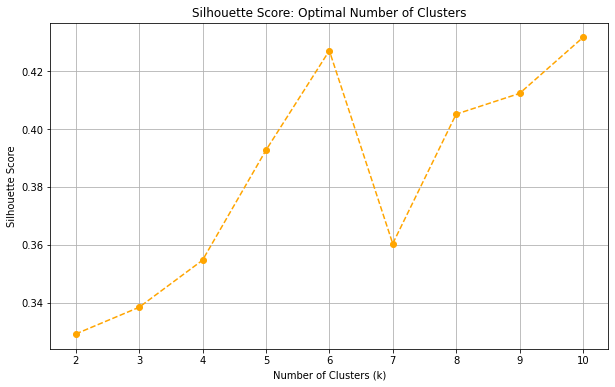

In [13]:
# Plot silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

The silhouette score is satisfactory at k=6

Taking in the above three metrics, we can say the optimal k value is 3

### Visualise clusters

In [14]:
optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(processed_features_df)

# Add the cluster to the original DataFrame
processed_features_df['Cluster'] = clusters

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Reducing dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(processed_features_df.drop(columns='Cluster'))

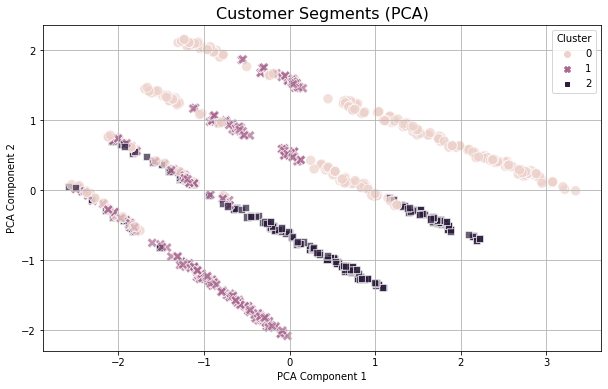

In [ ]:
# Visualise with PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=processed_features_df['Cluster'],
    style=processed_features_df['Cluster'], s=100, alpha=0.7
)
plt.title('Customer Segments (PCA)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()

Using t-SNE as it can capture nonlinear relationships in the data.

c:\Users\Yash J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Yash J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


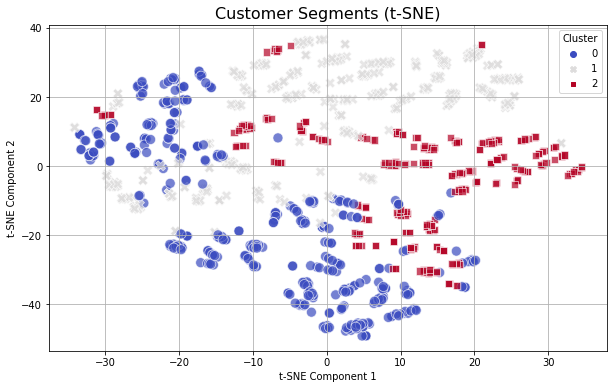

In [17]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_features = tsne.fit_transform(processed_features_df.drop(columns='Cluster'))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=tsne_features[:, 0], y=tsne_features[:, 1],
    hue=processed_features_df['Cluster'], palette='coolwarm',
    style=processed_features_df['Cluster'], s=100, alpha=0.7
)
plt.title('Customer Segments (t-SNE)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()